# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
outputDataFile = "Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

# citipy usage
Looking up for city names with geo-coordinates has always been a big problem when it comes to dealing with social data.
We have only this many cities in the world, why isn't there any data set that provides the geo coordinates for all the

available cities, and we can use certain data structure/algorithm like kdtree to look up the nearest city given a set of geo coordinates?

Luckily, both Maxmind(www.maxmind.com/en/free-world-cities-database) and GeoNames(download.geonames.org/export/dump) provide comprehensive data sets like this.

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# make up the dynamic url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
queryUrl = f"{url}appid={api_key}&units={units}&q="
print(queryUrl)
# set up lists to hold reponse info
cityName = []
countryName = []
latitude = []
longitude = []
maxTemp = []
humidity = []
cloudiness = []
date = []
windSpeed = []

http://api.openweathermap.org/data/2.5/weather?appid=f16687ffd6cc384e02b2b3834a3a3fd9&units=imperial&q=


In [4]:
# counter for the call
cnt = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#now loop through the city list built earlier
for city in cities:
    
    # error handling to skip the error/not found cities
    try:
        #print(f"{queryUrl}{city}")
        # limit calls to 500 cities as required
        if (cnt > 500):
            break
        response = requests.get(f"{queryUrl}{city}").json()
        cityName.append(response["name"])
        countryName.append(response["sys"]["country"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        maxTemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        date.append(response["dt"])
        windSpeed.append(response["wind"]["speed"])
        
        print(f"Processing data for {cnt} ~ {city}")
        cnt += 1
        
        # wait for a second to avoid blocking the calls
        time.sleep(1.00)
        
    except:
        print(f"{city} not found, skipping to next city!")
        
    continue


Beginning Data Retrieval
-------------------------------
Processing data for 1 ~ rikitea
Processing data for 2 ~ carnarvon
Processing data for 3 ~ shirokiy
Processing data for 4 ~ vysokogornyy
Processing data for 5 ~ bethel
Processing data for 6 ~ bambous virieux
Processing data for 7 ~ jamestown
Processing data for 8 ~ atuona
Processing data for 9 ~ malanje
Processing data for 10 ~ cape town
Processing data for 11 ~ aklavik
Processing data for 12 ~ sarai sidhu
Processing data for 13 ~ ushuaia
Processing data for 14 ~ songjianghe
Processing data for 15 ~ mpika
Processing data for 16 ~ tiksi
Processing data for 17 ~ ostrovnoy
Processing data for 18 ~ norman wells
Processing data for 19 ~ kaitangata
Processing data for 20 ~ ereymentau
Processing data for 21 ~ ribeira grande
Processing data for 22 ~ qeshm
Processing data for 23 ~ anadyr
Processing data for 24 ~ pevek
Processing data for 25 ~ mataura
Processing data for 26 ~ talnakh
Processing data for 27 ~ hilo
cheuskiny not found, skippi

mrirt not found, skipping to next city!
Processing data for 203 ~ pangnirtung
chagda not found, skipping to next city!
Processing data for 204 ~ ust-tsilma
Processing data for 205 ~ sobolevo
Processing data for 206 ~ alta floresta
Processing data for 207 ~ san jeronimo
Processing data for 208 ~ rawson
Processing data for 209 ~ san vicente
Processing data for 210 ~ arraial do cabo
Processing data for 211 ~ luang prabang
Processing data for 212 ~ kutum
Processing data for 213 ~ lebu
Processing data for 214 ~ mallaig
Processing data for 215 ~ upernavik
Processing data for 216 ~ flinders
Processing data for 217 ~ saint-augustin
Processing data for 218 ~ mahebourg
Processing data for 219 ~ polson
Processing data for 220 ~ tuktoyaktuk
Processing data for 221 ~ chadiza
Processing data for 222 ~ mutsu
Processing data for 223 ~ kahului
Processing data for 224 ~ huilong
Processing data for 225 ~ nanning
Processing data for 226 ~ chernyshevskiy
Processing data for 227 ~ samthar
Processing data fo

babanusah not found, skipping to next city!
Processing data for 413 ~ chapleau
Processing data for 414 ~ plettenberg bay
Processing data for 415 ~ sandata
labutta not found, skipping to next city!
Processing data for 416 ~ abu kamal
Processing data for 417 ~ la ronge
Processing data for 418 ~ haftoni
raga not found, skipping to next city!
Processing data for 419 ~ kieta
Processing data for 420 ~ nome
Processing data for 421 ~ nyurba
Processing data for 422 ~ meulaboh
karkaralinsk not found, skipping to next city!
Processing data for 423 ~ pucheni
Processing data for 424 ~ kuito
Processing data for 425 ~ bundaberg
Processing data for 426 ~ ola
Processing data for 427 ~ zaysan
inderborskiy not found, skipping to next city!
Processing data for 428 ~ esfarayen
Processing data for 429 ~ san andres
Processing data for 430 ~ morros
Processing data for 431 ~ muros
Processing data for 432 ~ bobrovytsya
Processing data for 433 ~ saint simons
Processing data for 434 ~ tuatapere
Processing data fo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create DataFrame
weather = {
    "City": cityName,
    "Cloudiness":cloudiness, 
    "Country":countryName,
    "Date":date, 
    "Humidity": humidity,
    "Latitude":latitude, 
    "Longitude":longitude, 
    "Max Temp": maxTemp,
    "Wind Speed":windSpeed
}

weatherData = pd.DataFrame(weather)
weatherData.count()

City          500
Cloudiness    500
Country       500
Date          500
Humidity      500
Latitude      500
Longitude     500
Max Temp      500
Wind Speed    500
dtype: int64

In [6]:
# save the output in csv
weatherData.to_csv(outputDataFile)
weatherData.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Rikitea,100,PF,1569893650,81,-23.12,-134.97,68.81,17.65
1,Carnarvon,0,ZA,1569893744,83,-30.97,22.13,41.99,8.16
2,Shirokiy,69,RU,1569893746,97,53.87,39.17,55.99,5.01
3,Vysokogornyy,84,RU,1569893747,65,50.10,139.13,52.07,5.46
4,Bethel,1,US,1569893748,62,60.79,-161.76,51.80,11.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

* Using Scatter plot from matplotlib
https://matplotlib.org/3.1.1/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py

In [7]:
# set scatter marker size and color sequesce
area = (30 * np.random.rand(len(weatherData)))**2
colors = np.random.rand(len(weatherData))

#### Latitude vs. Temperature Plot

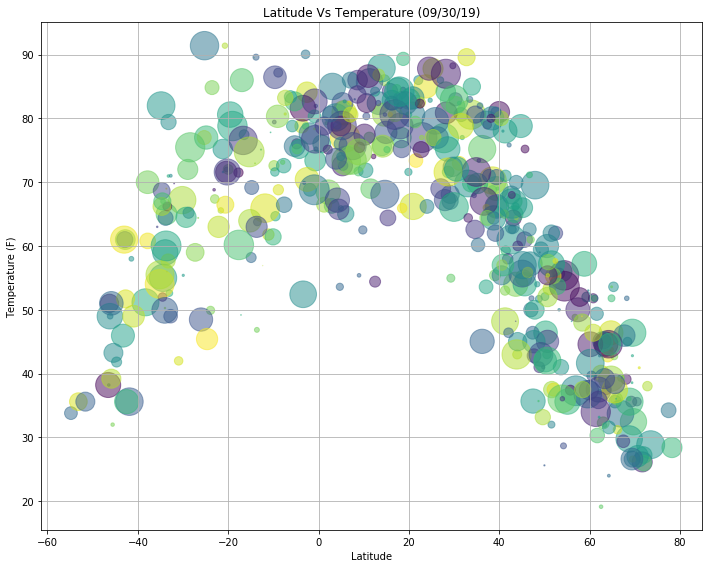

In [8]:
plt.figure(figsize=(10, 8))
plt.scatter(weatherData["Latitude"], weatherData["Max Temp"], marker="o", s=area, c=colors, alpha=0.5)
plt.title(f"Latitude Vs Temperature ({time.strftime('%x')})")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# saving the plot
plt.tight_layout()
plt.savefig("Output/LatVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

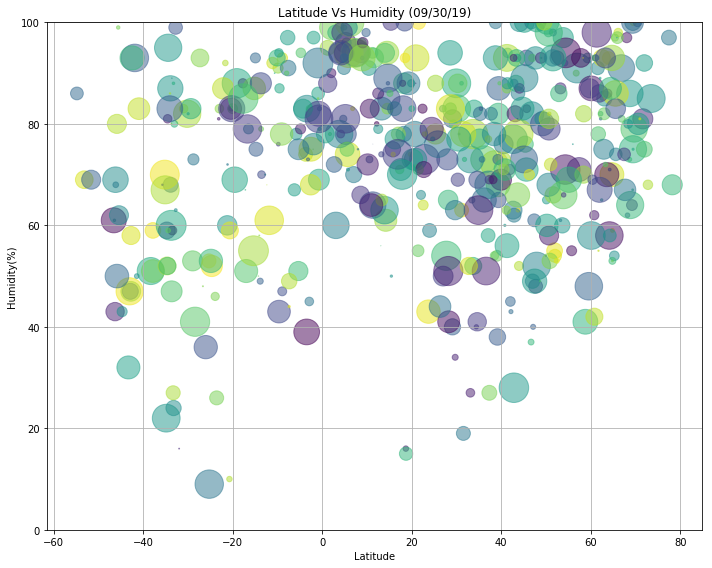

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(weatherData["Latitude"], weatherData["Humidity"], marker="o", s=area, c=colors, alpha=0.5)
plt.title(f"Latitude Vs Humidity ({time.strftime('%x')})")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.ylim(0, 100)
plt.grid(True)

# saving the plot
plt.tight_layout()
plt.savefig("Output/LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

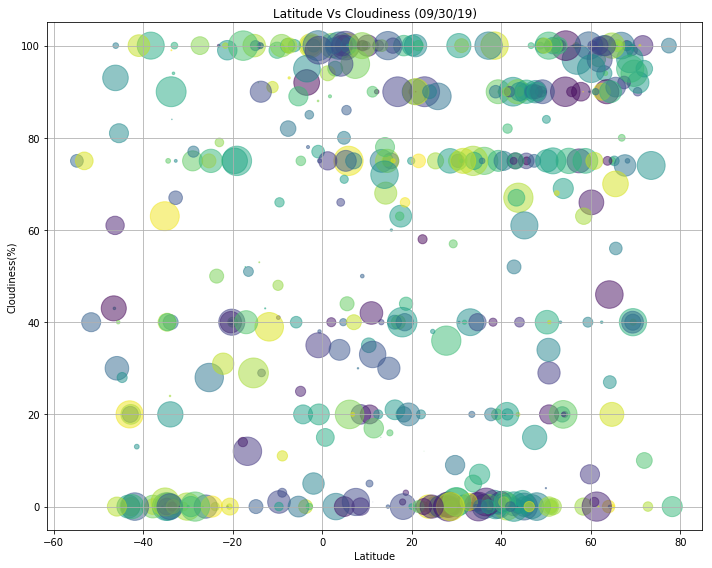

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(weatherData["Latitude"], weatherData["Cloudiness"], marker="o", s=area, c=colors, alpha=0.5)
plt.title(f"Latitude Vs Cloudiness ({time.strftime('%x')})")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# saving the plot
plt.tight_layout()
plt.savefig("Output/LatVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

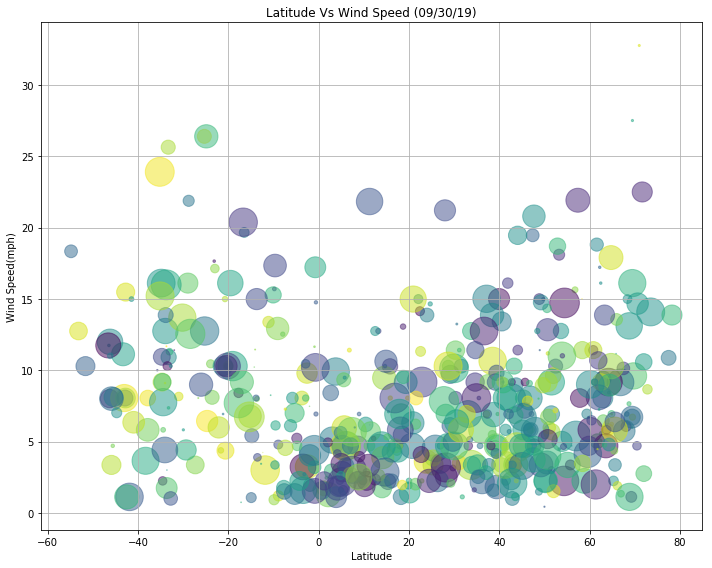

In [14]:
plt.figure(figsize=(10, 8))
plt.scatter(weatherData["Latitude"], weatherData["Wind Speed"], marker="o", s=area, c=colors, alpha=0.5)
plt.title(f"Latitude Vs Wind Speed ({time.strftime('%x')})")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# saving the plot
plt.tight_layout()
plt.savefig("Output/LatVsWindSpeed.png")
plt.show()